---
# Section1_project 

## 목표 : 주어진 데이터를 이용해 다음 분기에 어떤 게임을 만들어야 할까 ?
---
## 게임데이터 정보 
-  Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다 
---
### 3가지 질문에 답할 수 있어야 한다. 
- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

### 데이터 불러오기 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' # 한글 깨짐해결 

origin = pd.read_csv("vgames2.csv")
df = origin.copy()

# 1. EDA & Data Wrangling 
 - EDa : 탑색적 데이터 분석 여러각도에서 데이터를 살펴보는것 
 - data wrangling : data를 가공하여  쉽게 분석/접근 할 수 있도록 변환하는 과정.
### 결측치 확인 
- platform
- publisher
- genre


In [2]:
df.info()  # 결측데이터   (년도 , 장르) : 판매량 먼저 보고 결정. !  , 개발사 (중요도 낮기 떄문에 안지움)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


### 데이터 품질 문제 발견 
- Year float타입 -> int로 변경 
- 출고량에 K,M 포함되어 나옴 일관된 수치로 변경 필요. 
 

In [157]:
origin.sample(10)  # 출고량에 0k , 0m  5472k 등등 이상하게 표기 된것 > float수정 ,년도 월은 필요 없어 보이는데 float인 상태. > int 수정 

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2435,2436,LEGO Dimensions,PS3,2015.0,Action,Warner Bros. Interactive Entertainment,0.15,0.3,0,0.09
5603,5604,Summon Night: Swordcraft Story,GBA,2003.0,Role-Playing,Banpresto,0.02,0.01,0K,0
11058,11059,SpongeBob's Atlantis SquarePantis,DS,2007.0,Action,THQ,1.5,0,0,0.11
13963,13964,Final Fantasy XI: Treasures of Aht Urhgan,PS2,2006.0,Role-Playing,Square Enix,0.06,0.05,0.1,0.02M
4774,4775,Spectrobes,DS,2007.0,Role-Playing,Disney Interactive Studios,0.67,0.03,0,0.06
12971,12972,Knights in the Nightmare,DS,2008.0,Role-Playing,Sting,0.06,0,0.02,0
15733,15734,"Monsters, Inc. Scream Team",PS,2001.0,Platform,Sony Computer Entertainment,0.31,0.21,0,0.04
7260,7261,"Crouching Tiger, Hidden Dragon",GBA,2003.0,Action,Ubisoft,0.02M,0.01,0,0
15954,15955,From Russia With Love,GC,2005.0,Action,Electronic Arts,0.17,0.04,0,0.01
11869,11870,Asphalt: Urban GT 2,DS,2006.0,Racing,Ubisoft,0.09,0.04,0,0.01


####  [중복은 없다. ]

In [4]:
df[df.duplicated()] # 중복은 없다. 


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


---
### 결측치 제거하지 않고 임의의 값 입력 
- Year 결측치 > 2030 
- publisher > unknown
- genre > unknown 
> 데이터도 많고 안지워도 분석에 문제가 없다고 판단.

In [5]:
df[df["Year"].isnull()]
df["Year"] = df["Year"].fillna("2030")
df[df["Year"].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [6]:
df[df["Publisher"].isnull()]
df["Publisher"]= df["Publisher"].fillna("Unknown")
df[df["Publisher"].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [7]:
df[df["Genre"].isnull()]
df["Genre"]= df["Genre"].fillna("Unknown")
df[df["Genre"].isnull()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


---

### year 열
- float 에서 int 변경 

In [8]:
df["Year"] = df["Year"].astype("int",errors='ignore')
df.sort_values(by = ["Year"], axis = 0 , ascending =False)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6223,6224,Rock Revolution,PS3,2030,Misc,Unknown,0.25,0,0,0.02
9958,9959,LEGO Batman: The Videogame,PSP,2030,Action,Warner Bros. Interactive Entertainment,0.57,0.46,0,0.28
6118,6119,Wheel of Fortune,PS2,2030,Misc,Unknown,0.47,0.36,0,0.12
5175,5176,Dance! It's Your Stage,Wii,2030,Misc,DTP Entertainment,0K,0.01,0,0
12986,12987,Call of Duty: Black Ops,PC,2030,Shooter,Activision,0.58,0.81,0,0.24
...,...,...,...,...,...,...,...,...,...,...
2249,2250,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0,0.09
8681,8682,NCAA Football 2002,PS2,1,Sports,Electronic Arts,0.77,0.6,0,0.2
14666,14667,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0,0.01
16394,16395,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


### 데이터 품질 문제 해결 
- 소수점으로 된 출고량들은 백만(m)이 생략된것임을 확인 그러므로 m으로 표기된것들은 삭제 k단위는 m단위로 변환시켜준다.  

In [9]:

df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]] = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].astype(str)
# object 는 숫자 문자 섞인거라 문자로 바꿔서 작업하면 편함. 
def sres (i) :  # 시리즈 적용함수 
    if "K" in i : 
        remove_k = i.replace("K","")
        return str(int(remove_k)*1000/1000000)
    elif "M" in i  :
        result = i.replace("M","")
        return result
    else :
        return i 
     

def km_change (sales) :
    return sales.apply(sres)
    
#     sales = sales.str.replace("K","000") # 이코드는 시리즈를 두번 보개한다 한번에 바꿀수 없을까? 
#     sales.str.replace("M","").
#     return 
        
        
df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]] = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].apply(km_change)
copy_df = df.copy()

### 출고량에서 k,m 단위가 사라졌는지 확인 .
> k,m이 없어진 것을 알 수 있다. 

In [10]:
df[df["NA_Sales"].str.contains("K", case =False) | df["EU_Sales"].str.contains("K", case =False) | df["JP_Sales"].str.contains("K", case =False) | df["Other_Sales"].str.contains("K", case =False) ]
# ,"EU_Sales","JP_Sales","Other_Sales"]]
print(df[df["NA_Sales"].str.contains("M", case =False) | df["EU_Sales"].str.contains("M", case =False) | df["JP_Sales"].str.contains("M", case =False) | df["Other_Sales"].str.contains("M", case =False) ])
#df['name'].str.contains('LI')

Empty DataFrame
Columns: [Unnamed: 0, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales]
Index: []


In [11]:
df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]] =df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16598 non-null  int64  
 4   Genre        16598 non-null  object 
 5   Publisher    16598 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.3+ MB


### Feature Engineering (1)
- 전체 출고량 순위를 알고 싶어서 지역별 출고량을 전부 합친 sum열 생성.  

In [12]:

pd.set_option('display.max_rows', 50)
df["sum"]  = df["NA_Sales"] + df["EU_Sales"]+ df["JP_Sales"]+df["Other_Sales"]
df = df.sort_values("sum", ascending = False)
df.reset_index(drop = True,inplace = True)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
0,2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16593,5950,Spider-Man: Friend or Foe,PC,2007,Action,Activision,0.01,0.00,0.00,0.00,0.01
16594,12374,Bejeweled Blitz,PC,2010,Puzzle,Mastertronic,0.00,0.01,0.00,0.00,0.01
16595,15847,Sea Monsters: A Prehistoric Adventure,DS,2007,Adventure,DSI Games,0.01,0.00,0.00,0.00,0.01
16596,3496,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01


### Feature Engineering (2)
- 지역별, 장르별 출고량 총합 

In [13]:
Na_genre_sum  = [] 
for i in df["Genre"].unique() :
    Na_genre_sum.append([i,df["NA_Sales"][df["Genre"] == i].sum()])
    
Na_genre_sum   
genre_diff = pd.DataFrame(Na_genre_sum, columns = ["Genre","NaS"]) 
genre_diff  # display setoption 준거 30 지정시 표시되는 데이터갯수가 40개면 ...으로 초과하기 때문 

,Genre,NaS
0,Sports,680.52
1,Platform,446.44
2,Racing,357.19
3,Role-Playing,319.54
4,Puzzle,123.35
5,Misc,408.05
6,Shooter,581.92
7,Simulation,182.96
8,Action,874.81
9,Unknown,20.61


In [14]:
Eu_genre_sum  = [] 
japan_gn = []
other_gn = []
for i in df["Genre"].unique() :
    Eu_genre_sum.append(df["EU_Sales"][df["Genre"] == i].sum())
    japan_gn.append(df["JP_Sales"][df["Genre"] == i].sum())
    other_gn.append(df["Other_Sales"][df["Genre"] == i].sum())  

> **F/E (2) 결과**

In [15]:
genre_diff["EuS"] = pd.Series(Eu_genre_sum)
genre_diff["JpS"] = pd.Series(japan_gn)
genre_diff["OtS"] = pd.Series(other_gn)
genre_diff

,Genre,NaS,EuS,JpS,OtS
0,Sports,680.52,376.48,135.37,134.67
1,Platform,446.44,201.61,130.65,51.53
2,Racing,357.19,237.10,56.40,77.10
3,Role-Playing,319.54,183.58,344.95,56.96
4,Puzzle,123.35,50.73,56.87,12.52
5,Misc,408.05,212.36,105.27,74.04
6,Shooter,581.92,313.05,38.28,102.65
7,Simulation,182.96,113.35,63.70,31.48
8,Action,874.81,522.16,157.90,186.45
9,Unknown,20.61,13.12,12.88,5.54


In [16]:
import numpy as np
df[df["Genre"] == np.NaN]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum


In [17]:
df[df["Genre"] == "Unknown"].sort_values("sum", ascending = False)
# 장르에 unknown처리한 게임이 어떤게임들이 있는지 궁금해서 쳐봄. 

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
32,1972,Pokemon X/Pokemon Y,3DS,2013,Unknown,Nintendo,5.17,4.05,4.34,0.79,14.35
78,4599,Wii Party,Wii,2010,Unknown,Nintendo,1.79,3.53,2.49,0.68,8.49
147,9489,Final Fantasy XII,PS2,2006,Unknown,Square Enix,1.88,0.00,2.33,1.74,5.95
552,12332,Onimusha: Warlords,PS2,2001,Unknown,Virgin Interactive,0.99,0.48,1.09,0.14,2.70
663,15527,Bloodborne,PS4,2015,Unknown,Sony Computer Entertainment,1.00,0.76,0.26,0.36,2.38
703,16588,Need for Speed Underground 2,XB,2004,Unknown,Electronic Arts,1.38,0.80,0.00,0.10,2.28
936,5669,Chrono Cross,PS,1999,Unknown,SquareSoft,0.62,0.42,0.69,0.12,1.85
1461,3933,MVP Baseball 2004,PS2,2004,Unknown,Electronic Arts,1.10,0.06,0.00,0.18,1.34
1827,11064,Yakuza 3,PS3,2009,Unknown,Sega,0.21,0.21,0.62,0.08,1.12
1856,11497,F-Zero X,N64,1998,Unknown,Nintendo,0.45,0.33,0.29,0.03,1.10


In [18]:
pd.set_option('display.max_rows', 100)
df.iloc[100:200]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
100,1036,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32
101,15982,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.29
102,11300,Just Dance,Wii,2009,Misc,Ubisoft,3.51,3.03,0.00,0.73,7.27
103,9453,Battlefield 3,PS3,2011,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23
104,6529,Need for Speed Underground,PS2,2003,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20
105,10941,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.18
106,9148,Crash Bandicoot 3: Warped,PS,1998,Platform,Sony Computer Entertainment,3.68,1.75,1.42,0.28,7.13
107,10160,Super Smash Bros. Melee,GC,2001,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.06
108,11293,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
109,4212,Mario Kart 8,WiiU,2014,Racing,Nintendo,3.13,2.07,1.27,0.49,6.96


In [19]:
import matplotlib.pyplot as plt 
genre_sum = []
# plt.pie(genre_diff)
for i in range(len(genre_diff)):
    genre_sum.append(genre_diff.iloc[i,1:].sum())
genre_diff["gr_sum"] = pd.Series(genre_sum)
genre_diff



,Genre,NaS,EuS,JpS,OtS,gr_sum
0,Sports,680.52,376.48,135.37,134.67,1327.04
1,Platform,446.44,201.61,130.65,51.53,830.23
2,Racing,357.19,237.10,56.40,77.10,727.79
3,Role-Playing,319.54,183.58,344.95,56.96,905.03
4,Puzzle,123.35,50.73,56.87,12.52,243.47
5,Misc,408.05,212.36,105.27,74.04,799.72
6,Shooter,581.92,313.05,38.28,102.65,1035.90
7,Simulation,182.96,113.35,63.70,31.48,391.49
8,Action,874.81,522.16,157.90,186.45,1741.32
9,Unknown,20.61,13.12,12.88,5.54,52.15


In [20]:
genre_diff = genre_diff.set_index("Genre")


# genre_diff.loc["Sports", :]
# genre_diff.loc[0, :]

### 각장르별 지역 비율 
- 장르별 합 데이터 프레임을 행기준으로 시각화한경우 
> 전체적으로 Na 지역의 비율이 높은것으로 보아 **Na의 시장규모가 큰것**을 알 수 있다. 

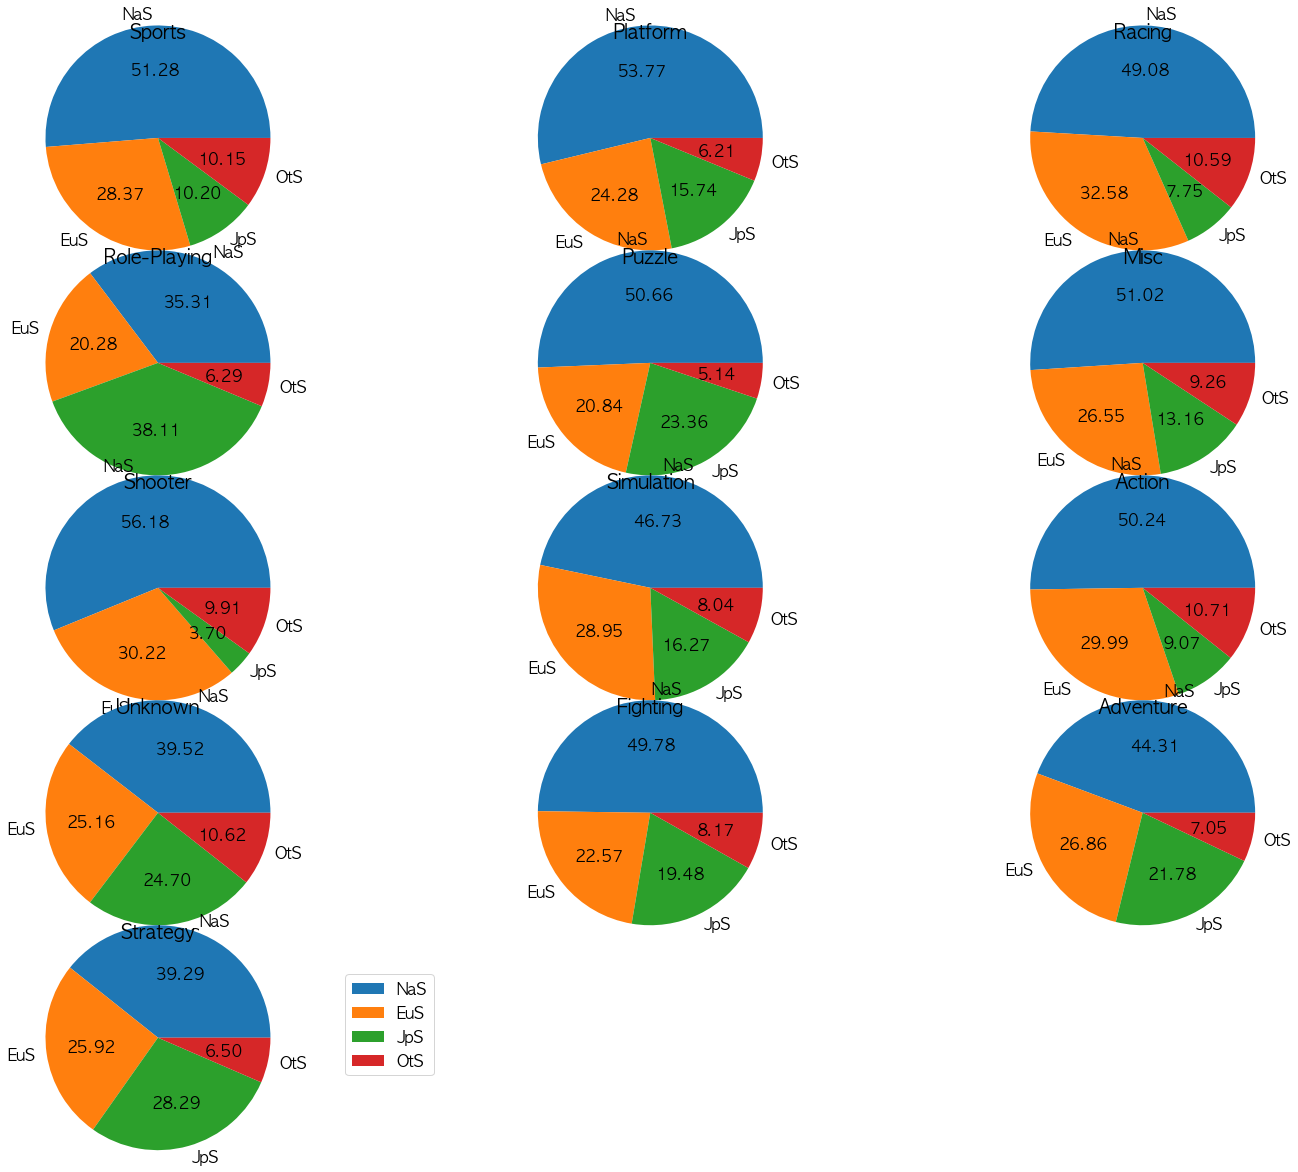

In [21]:
plt.figure(figsize = (25,20))
plt.rcParams['font.size'] = '16' #지역별 한장르의 비율   
for i in range(13):
    
    plt.subplot(5,3,i+1)
    plt.pie(genre_diff.iloc[i,  : 4 ], autopct='%.2f',labels= list(genre_diff.columns[:4]),radius=1.5)
    plt.title(genre_diff.index[i])
   
plt.legend(loc=(1.5, 0.3)) # 범례 위치조정 .


### Q1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
- 장르별 합 데이터 프레임을 열기준으로 시각화한경우 
- 아래 그래프를 보고 질문에 답할 수 있다.
- jp 지역만 롤플레잉게임을 선호하는 것을 알 수 있고 나머지 지역은 비슷하게 액션 ,스포츠, 슈터 순으로 선호하는 것을 알 수 있다. 

                 NaS     EuS     JpS     OtS   gr_sum
Genre                                                
Action        874.81  522.16  157.90  186.45  1741.32
Sports        680.52  376.48  135.37  134.67  1327.04
Shooter       581.92  313.05   38.28  102.65  1035.90
Racing        357.19  237.10   56.40   77.10   727.79
Misc          408.05  212.36  105.27   74.04   799.72
Role-Playing  319.54  183.58  344.95   56.96   905.03
Platform      446.44  201.61  130.65   51.53   830.23
Fighting      223.20  101.22   87.34   36.64   448.40
Simulation    182.96  113.35   63.70   31.48   391.49
Adventure     105.66   64.05   51.95   16.81   238.47
Puzzle        123.35   50.73   56.87   12.52   243.47
Strategy       68.70   45.32   49.46   11.36   174.84
Unknown        20.61   13.12   12.88    5.54    52.15


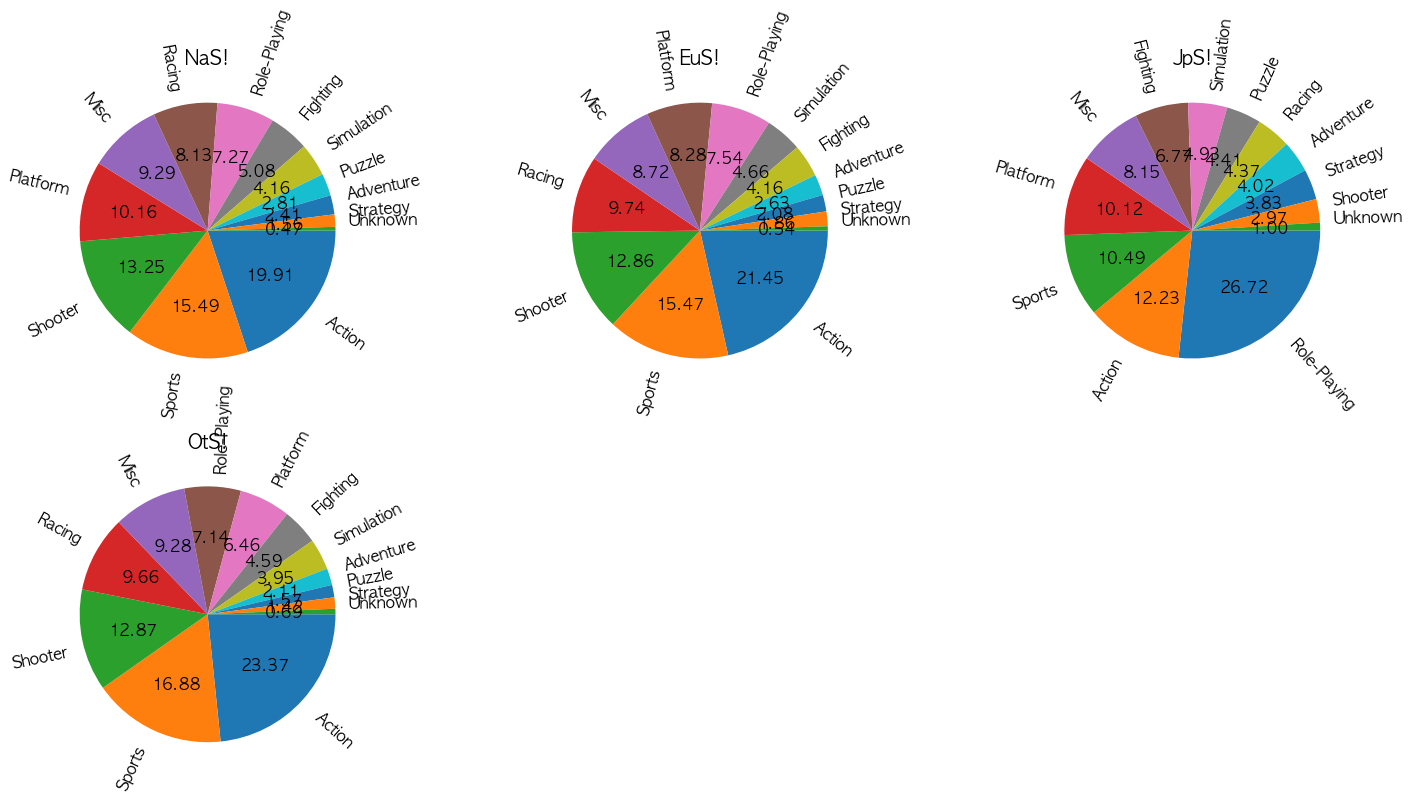

In [22]:
plt.figure(figsize = (25,20))
for i,land in enumerate(genre_diff.columns[:-1]): 
    plt.subplot(3,3,1+i)
    genre_diff_n = genre_diff.sort_values(land, ascending = False)
    plt.pie(genre_diff_n[land], labels = list(genre_diff_n.index),rotatelabels =True, counterclock =False, autopct='%.2f')
    plt.title(land+"!")
print(genre_diff_n)   
# rotatelabels은 label이 회전함 .


### 년도별 장르 트렌드 알아보려는 과정중 년도에 1,2자리 값이 들어간것을 확인 

In [23]:

(df["Genre"] == "Unknown").sum() # 50ㄱ ㅐ 

df[["Year","Genre"]]

pd.crosstab(df['Year'],df["Genre"])

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Unknown
Year,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0,0,0,0,3,0,2,0,0,1,1,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,1,0,0,1,0,0
6,2,0,1,0,0,0,0,0,2,1,1,0,0
7,0,0,0,0,0,2,1,0,0,0,0,0,0
8,1,1,1,2,0,1,0,0,1,1,2,0,0


### 한두자리 년도는 2000년대를 의미할것으로 판단하고 4자리 년도로 수정 

In [24]:
# 년도 이상값 수정 한자리 , 두자리는 2000년대 일수밖에 없다고 판단하고  16이상은 1900년대라고 생각하고 수정 
def add_num(i):
    if i < 17 : 
        return 2000+i
    elif i < 100 : 
        return 1900+i
    else : 
        return i  
df["Year"]=df["Year"].apply(add_num)
crst = pd.crosstab(df['Year'],df["Genre"])
c_i = crst.index
c_i
c_c = crst.columns
c_c

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy',
       'Unknown'],
      dtype='object', name='Genre')

### 년도별 장르 빈도 히스토그램으로 표현 
> **문제점** : 그래프에 위와 같은데이터를 넣는다고 척척 쌓이는게 아님. 
- **해결방법** : 누적데이터를 시각화하면됨. ex ) action + adventure + ... 

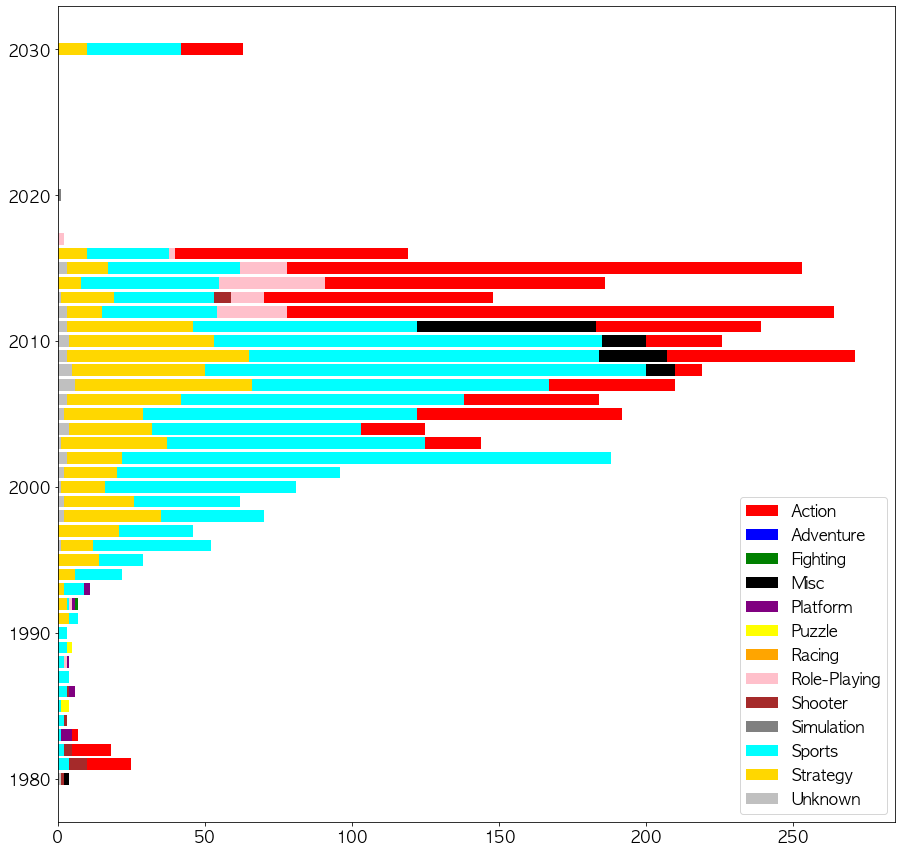

In [25]:
# ax = crst.plot(kind='barh', stacked=True, title="연도별 장르 선호도", rot=-90)
color = ["red","blue","green","black","purple","yellow","orange","pink","brown","gray","aqua","gold","silver"]
plt.figure(figsize=(15,15))
for i,col in enumerate(crst.columns): 
    plt.barh(crst.index,crst[col],color = color[i])
# plt.barh(crst.index,crst.Action)
# plt.barh(crst.index,crst.Adventure )
# plt.barh(crst.index,crst.Fighting )
plt.legend(crst.columns)

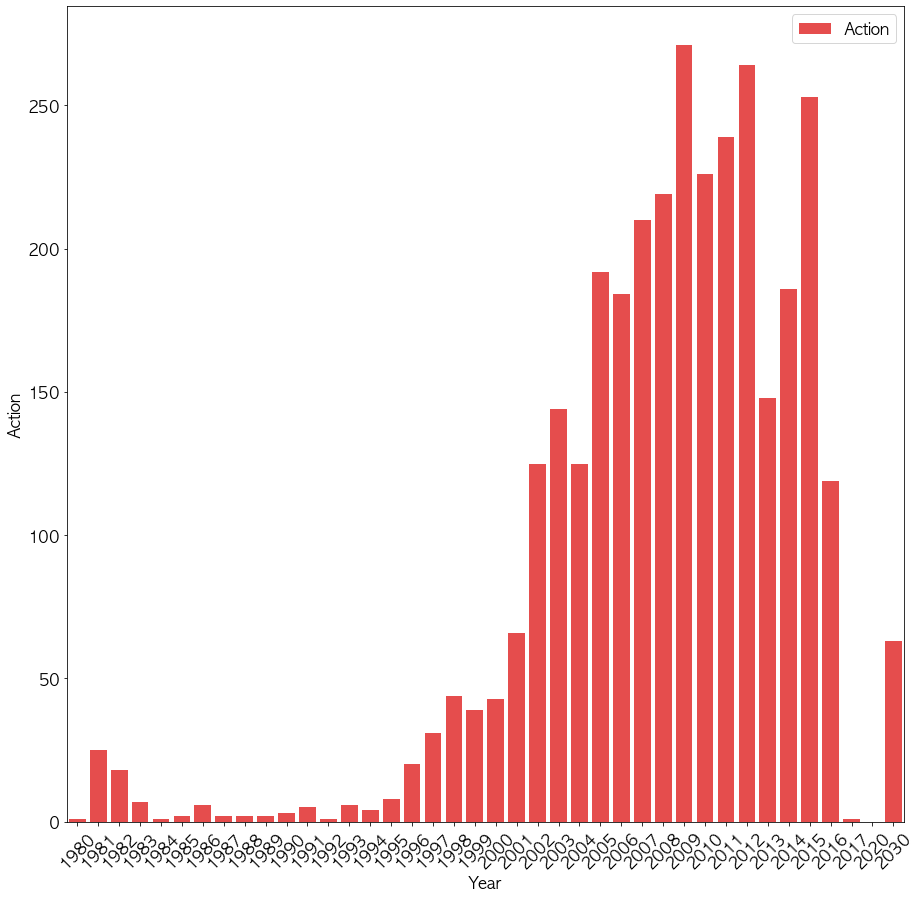

In [26]:
import seaborn as sns
color = ["red","blue","green","black","purple","yellow","orange","pink","brown","gray","aqua","gold","silver"]


ccc = crst.reset_index()

plt.figure(figsize=(15,15))
plt.xticks(rotation=45)

# for i,col in enumerate(ccc.columns[1:]) : 

#     s1 = sns.barplot(x = 'Year', y = col, data = ccc, color = color[i], alpha =1, label = col)
sns.barplot(x = 'Year', y = "Action", data = ccc, color = "red", alpha =0.8, label = "Action")

plt.legend()

### 데이터를 누적시킨 데이터 프레임 생성 


In [27]:
ccc
df1 = pd.DataFrame()
color = ["red","blue","green","black","purple","yellow","orange","pink","brown","gray","aqua","gold","silver"]

for i in range(len(ccc.columns)-1): 
    if i == 0 : 
        df1[i] = ccc.iloc[:,i+1]
    else : 
        df1[i] = df1.iloc[:,-1] + ccc.iloc[:,i+1]
df1.set_index(c_i)


,0,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,,
1980,1,1,2,6,6,6,6,6,8,8,8,8,9
1981,25,25,25,25,28,30,31,31,41,42,46,46,46
1982,18,18,18,19,24,27,29,29,34,34,36,36,36
1983,7,8,8,9,14,15,15,15,16,16,17,17,17
1984,1,1,1,2,3,6,9,9,12,12,14,14,14
1985,2,2,3,3,7,11,11,11,12,13,14,14,14
1986,6,6,6,6,12,12,13,14,18,18,21,21,21
1987,2,3,5,5,7,7,7,10,12,12,16,16,16
1988,2,2,2,2,6,7,8,11,12,13,15,15,15


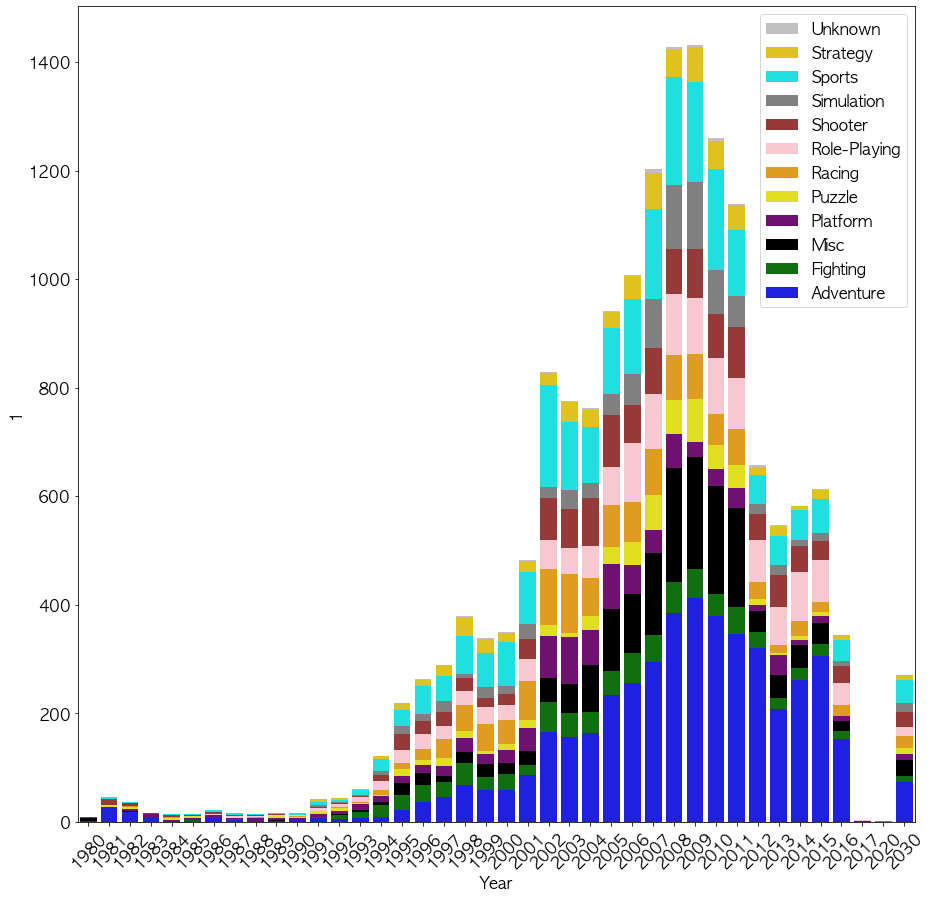

In [28]:
color = ["red","blue","green","black","purple","yellow","orange","pink","brown","gray","aqua","gold","silver"]

plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
for i in range(len(df1.columns)-1,0, -1) : 

#     s1 = sns.barplot(x = 'Year', y = col, data = ccc, color = color[i], alpha =1, label = col)
    sns.barplot(x =c_i , y = df1[df1.columns[i]] , data = df1, color = color[i], alpha =1, label = c_c[i])
plt.legend()

## Q2.  연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

### 선그래프 연도별 빈도 확인 
- 막대그래프로는 어떤 장르의 빈도가 더 높은지 비교하기 힘들어서 선그래프로 확인
- 2000년 중반부터는 액션의 빈도가 높은걸 알 수 있다.

Text(0.5, 1.0, '연도별 장르 빈도')

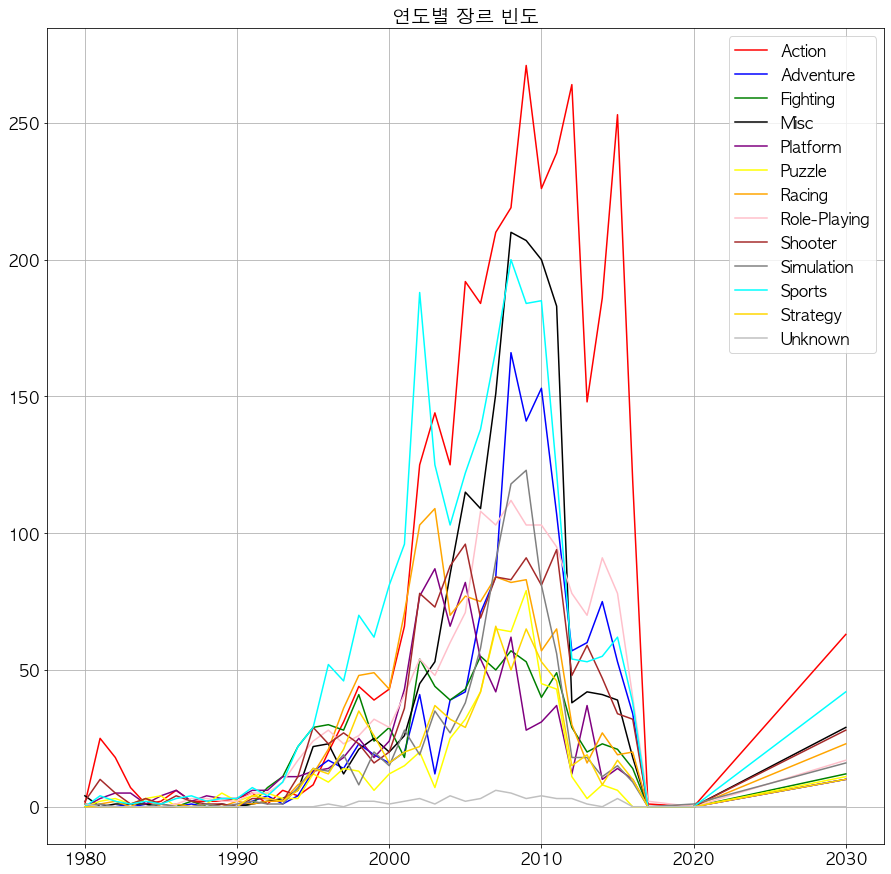

In [29]:
color = ["red","blue","green","black","purple","yellow","orange","pink","brown","gray","aqua","gold","silver"]
plt.figure(figsize=(15,15))
for i , col in enumerate(crst.columns): 
    plt.plot(crst.index,crst[col], label = col, color = color[i] )

plt.legend()
plt.grid(True)
plt.title("연도별 장르 빈도")

# 2003년 이전까지는 sport가 인기가 많았고 이후로는 액션이 인기가 더많아진 것을 볼 수 있다. 

In [30]:
copy_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]] = copy_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].astype(float)
copy_df["sum"] = copy_df["NA_Sales"] + copy_df["EU_Sales"] + copy_df["JP_Sales"]+ copy_df["Other_Sales"]
copy_df.sort_values("sum", ascending  = False)[:100].value_counts("Genre")
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다. 


Genre
Shooter         22
Platform        16
Role-Playing    14
Action          12
Racing          10
Misc             8
Sports           6
Simulation       4
Puzzle           3
Fighting         2
Unknown          2
Adventure        1
dtype: int64

In [31]:
towenty = copy_df[copy_df["Year"]>2010].sort_values("Year",ascending =False)
towenty[towenty["Year"] < 2030] # 날짜 모르는 것들 삭제 하고 분석 


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
6906,6907,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
15233,15234,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
5310,5311,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
10107,10108,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
8568,8569,XCOM 2,XOne,2016,Strategy,Take-Two Interactive,0.01,0.01,0.00,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...,...
6387,6388,Skylanders: Spyro's Adventure,Wii,2011,Action,Activision,1.40,1.14,0.00,0.31,2.85
6398,6399,Dragon Ball Kai: Ultimate Butouden,DS,2011,Fighting,Namco Bandai Games,0.00,0.00,0.09,0.00,0.09
6418,6419,Trine 2,PC,2011,Platform,Focus Home Interactive,0.00,0.03,0.00,0.01,0.04
6420,6421,Final Fantasy XIII-2,PS3,2011,Role-Playing,Square Enix,0.78,0.75,0.89,0.26,2.68


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

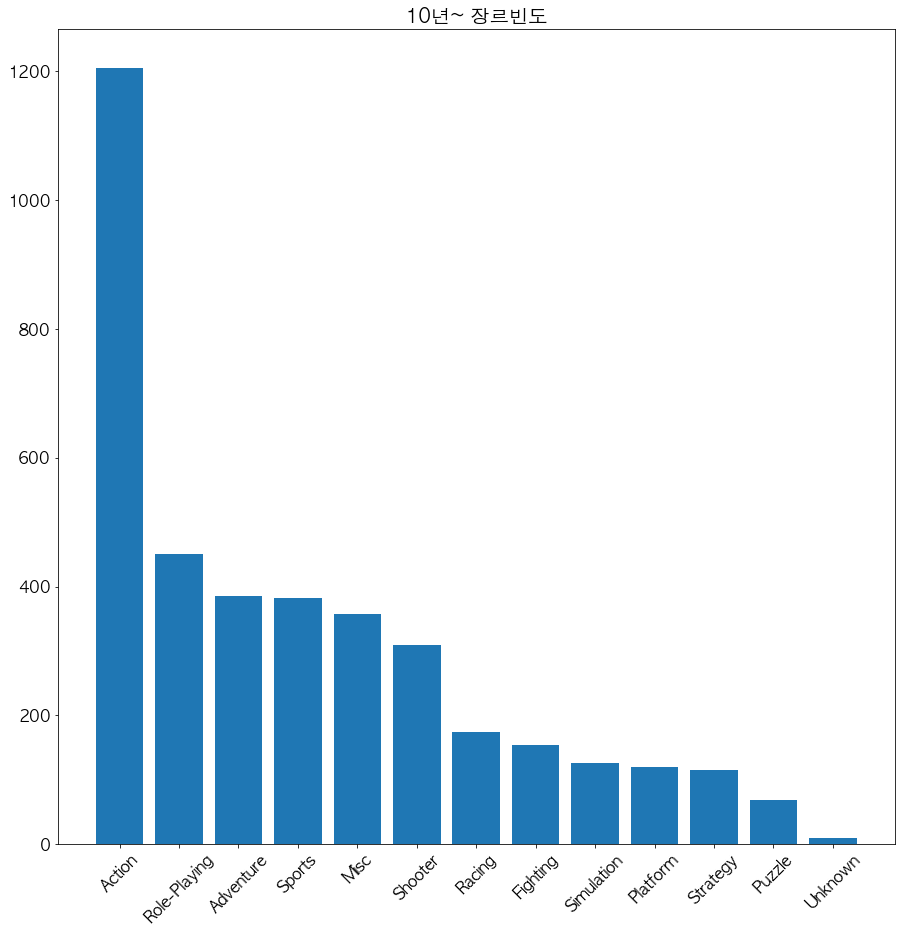

In [32]:
plt.rcParams["figure.figsize"] = (15,15)
s = towenty[towenty["Year"] < 2030]["Genre"].value_counts()
plt.bar(s.index, s)

plt.title("10년~ 장르빈도")
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

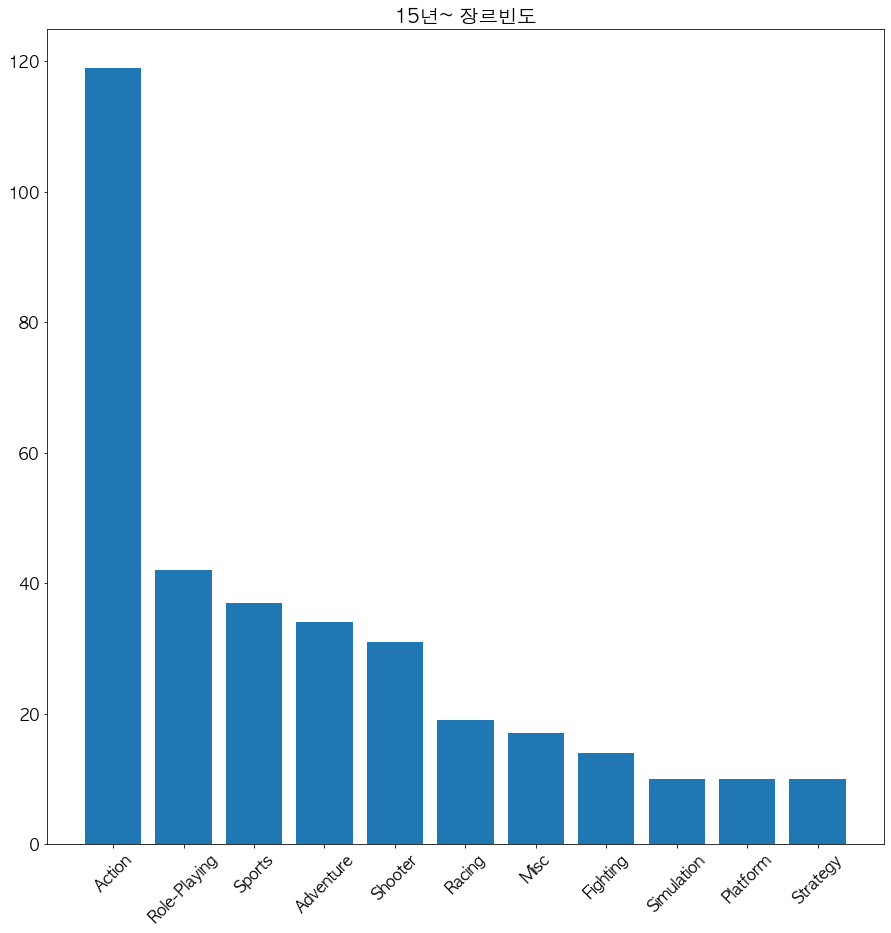

In [33]:
towenty = copy_df[copy_df["Year"]>2015].sort_values("Year",ascending =False)
s = towenty[towenty["Year"] < 2030]["Genre"].value_counts()
plt.bar(s.index, s)

plt.title("15년~ 장르빈도")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

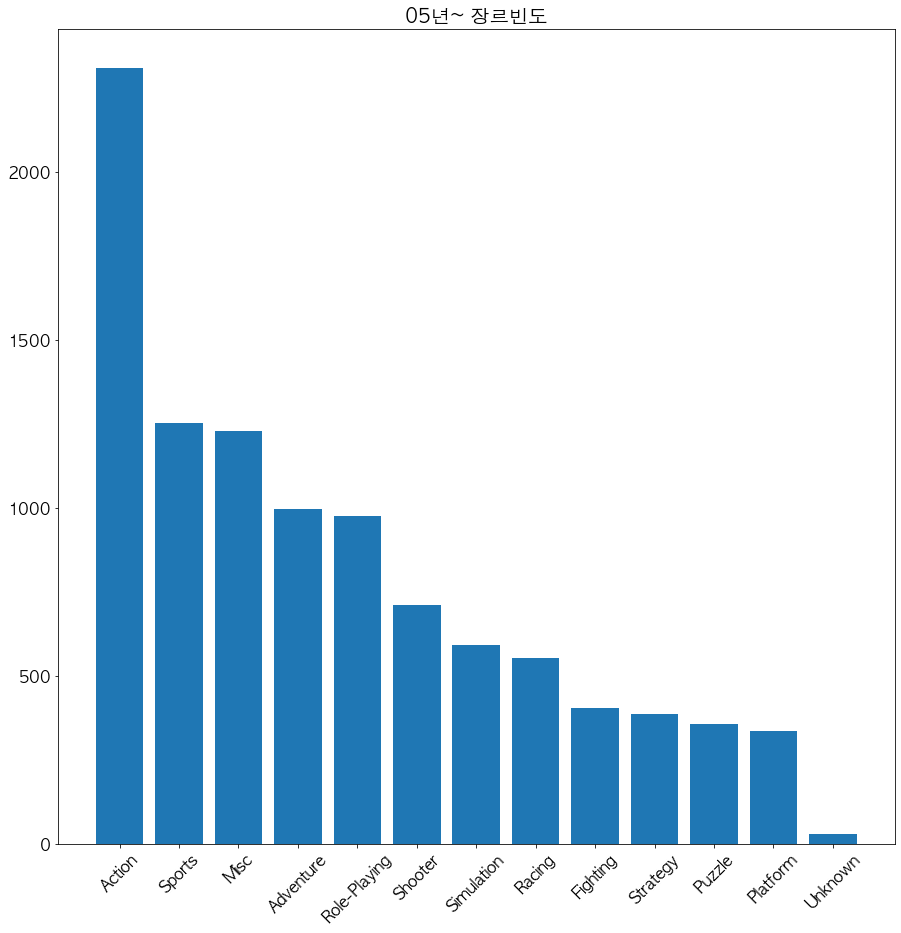

In [34]:
towenty = copy_df[copy_df["Year"]>2005].sort_values("Year",ascending =False)
s = towenty[towenty["Year"] < 2030]["Genre"].value_counts()
plt.bar(s.index, s)

plt.title("05년~ 장르빈도")
plt.xticks(rotation=45)

### 출고량 높은 게임에 대한 분석 

Text(0.5, 1.0, '출고량 상위100위 장르별 빈도')

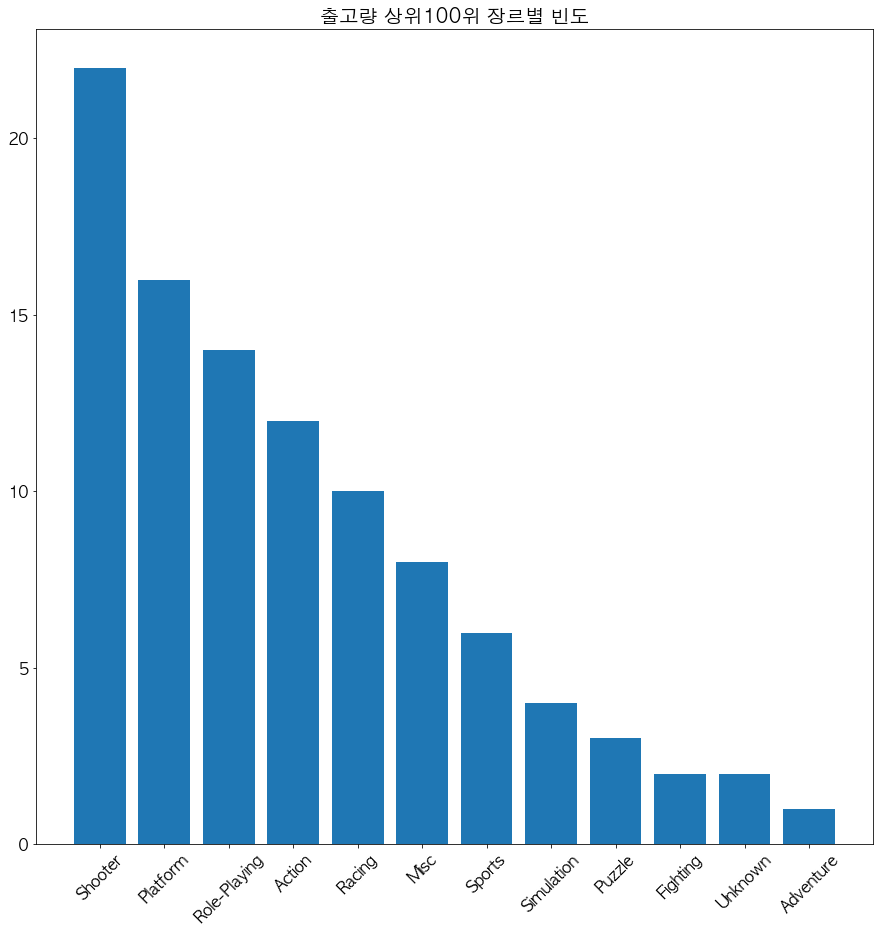

In [35]:

s = copy_df.sort_values("sum", ascending  = False)[:100].value_counts("Genre")
plt.figure(figsize=(15,15))
plt.bar(s.index,s)
plt.xticks(rotation=45)
plt.title("출고량 상위100위 장르별 빈도")

Text(0.5, 1.0, '출고량 상위50위 장르별 빈도')

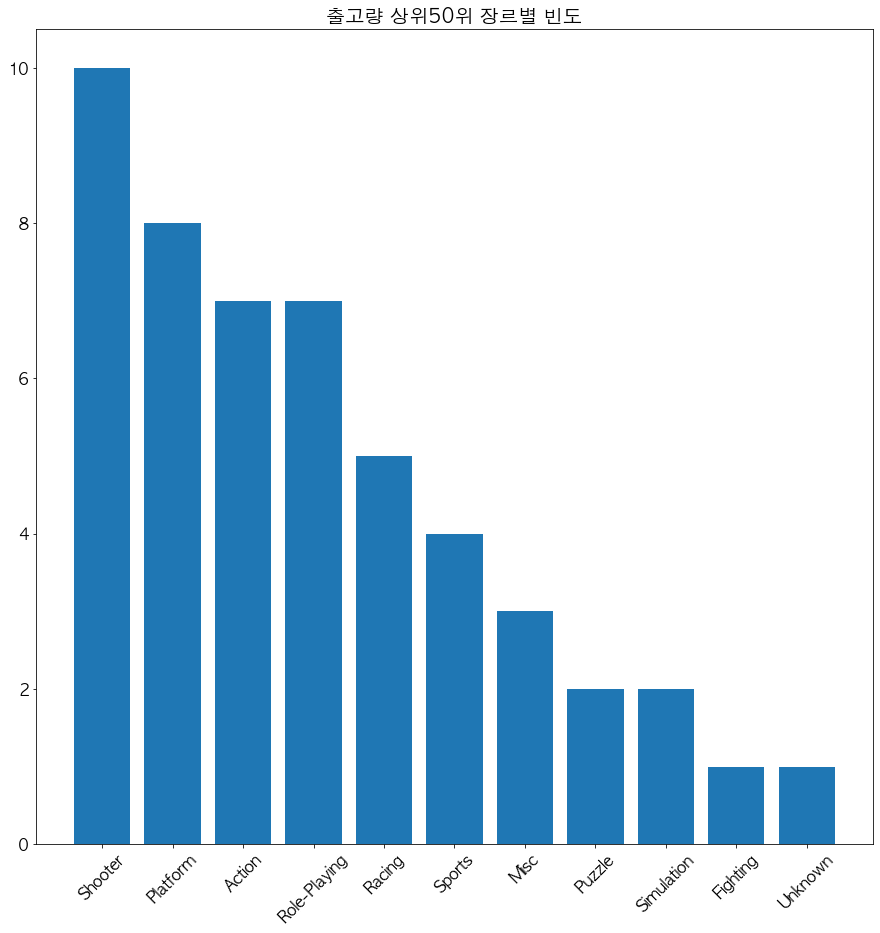

In [36]:
s = copy_df.sort_values("sum", ascending  = False)[:50].value_counts("Genre")
plt.figure(figsize=(15,15))
plt.bar(s.index,s)
plt.xticks(rotation=45)
plt.title("출고량 상위50위 장르별 빈도")

Text(0.5, 1.0, '출고량 상위20위 장르별 빈도')

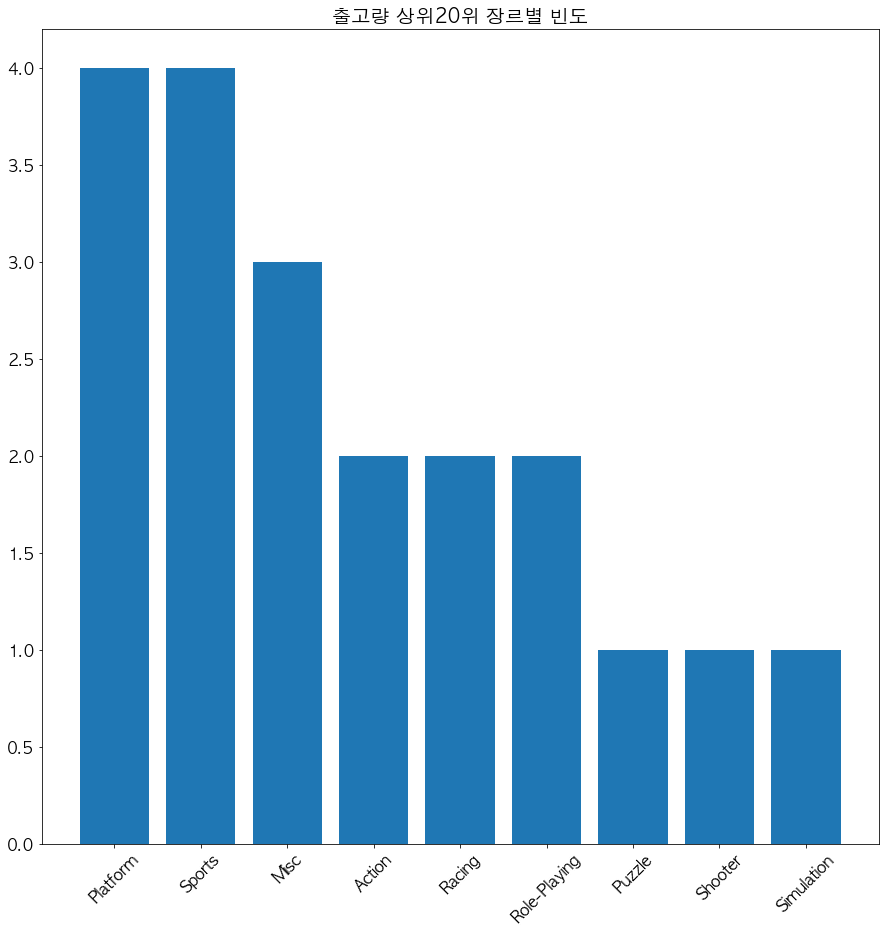

In [37]:
s = copy_df.sort_values("sum", ascending  = False)[:20].value_counts("Genre")
plt.figure(figsize=(15,15))
plt.bar(s.index,s)
plt.xticks(rotation=45)
plt.title("출고량 상위20위 장르별 빈도")

# Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
- 출고량 20, 10위에서 sport, platform 빈도가 높다. 그만큼 사람들의 관심을 많이 받는다는 것이므로 sport, platform 장르로 게임개발을 한다. 

Text(0.5, 1.0, '출고량 상위10위 장르별 빈도')

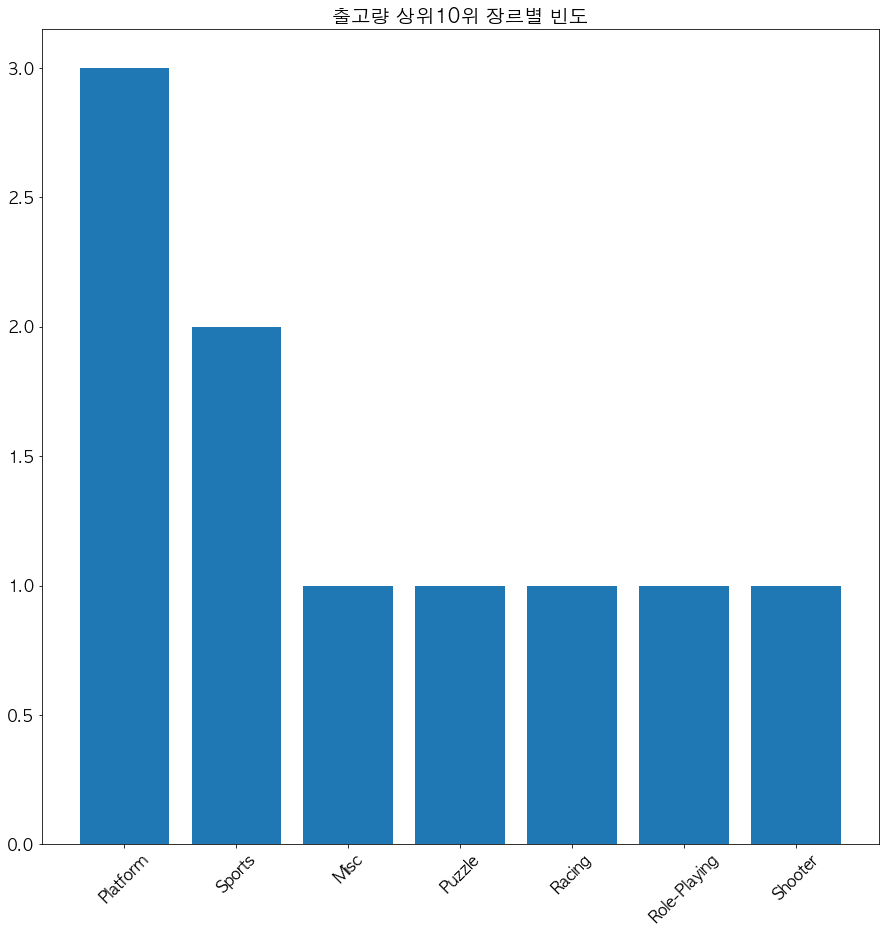

In [38]:
s = copy_df.sort_values("sum", ascending  = False)[:10].value_counts("Genre")
plt.figure(figsize=(15,15))
plt.bar(s.index,s)
plt.xticks(rotation=45)
plt.title("출고량 상위10위 장르별 빈도")

In [39]:

copy_df["sum"] = copy_df["NA_Sales"].astype(float) + copy_df["EU_Sales"].astype(float) + copy_df["JP_Sales"].astype(float) +copy_df["Other_Sales"].astype(float)
copy_df[copy_df["Genre"] == "Platform"].sort_values("sum", ascending = False)


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
4199,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6937,6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
16531,16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
13111,13112,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62
9491,9492,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
...,...,...,...,...,...,...,...,...,...,...,...
9750,9751,Teslagrad,PSV,2015,Platform,Rain Games,0.00,0.01,0.00,0.00,0.01
6315,6316,Codename: Kids Next Door: Operation V.I.D.E.O....,XB,2005,Platform,Global Star,0.01,0.00,0.00,0.00,0.01
11579,11580,NiGHTS into dreams...,PS2,2008,Platform,Sega,0.00,0.00,0.01,0.00,0.01
4275,4276,Contrast,PC,2013,Platform,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01


In [40]:
copy_df[copy_df["Genre"] == "Sports"].sort_values("sum",ascending =False)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
2908,2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3352,3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3435,3436,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
10899,10900,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
2639,2640,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
13404,13405,Disney Sports Basketball,GBA,2002,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00,0.01
7253,7254,NHL 2K3,GC,2002,Sports,Sega,0.01,0.00,0.00,0.00,0.01
15647,15648,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0.00,0.01,0.00,0.00,0.01
3919,3920,WTA Tour Tennis,GBA,2002,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00,0.01


In [41]:
copy_df[copy_df["Genre"] == "Misc"].sort_values("sum",ascending =False)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
3014,3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
4343,4344,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
13229,13230,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
223,224,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27
9230,9231,Just Dance 2,Wii,2010,Misc,Ubisoft,5.84,2.89,0.01,0.78,9.52
...,...,...,...,...,...,...,...,...,...,...,...
9176,9177,Nova Usagi no Game de Ryuugaku!? DS,DS,2007,Misc,Konami Digital Entertainment,0.00,0.00,0.01,0.00,0.01
9015,9016,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
9005,9006,Poker for Dummies,PC,2008,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
4312,4313,Cabbage Patch Kids: The Patch Puppy Rescue,GBA,2007,Misc,D3Publisher,0.01,0.00,0.00,0.00,0.01


### 상위 출고량이 전부 공급사가 닌텐도이고 장르는 sport 와 platform이 빈도가 높다. 

In [42]:
copy_df.sort_values("sum",ascending =False).iloc[:10] 
# 상위 출고량이 전부 공급사가 닌텐도이고 장르는 sport 와 platform이 빈도가 높다. 
# 그만큼 사람들의 관심을 많이 받는다는 것이므로 sport, platform 장르로 게임개발을 한다.  

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
2908,2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# 2. 가설검정 
## 👉귀무가설 : sport 게임을 만들면 출고량은 0.7M이거나 이하일 것이다. 
## 👉대립가설 : sport 만들면 출고량 0.7M 이상일 것이다. 

In [43]:
import random

random.seed(10)

means = []

for _ in range(1000):
     # copy_df[copy_df["Genre"] == "Sports"]  # 2341
    bootsample = copy_df[copy_df["Genre"] == "Sports"].sample(2431,replace=True)
    means.append(bootsample["sum"].mean())


--- 
# 신뢰구간으로 확인(sports)
--- 
- 신뢰구간 영역 (약 0.5 ~ 0.6 )에 모수가 있을 확률이 95퍼센트 이다. 
- 0.7 보다 밑이기 때문에 대립가설을 기각하고 귀무가설을 채택합니다.

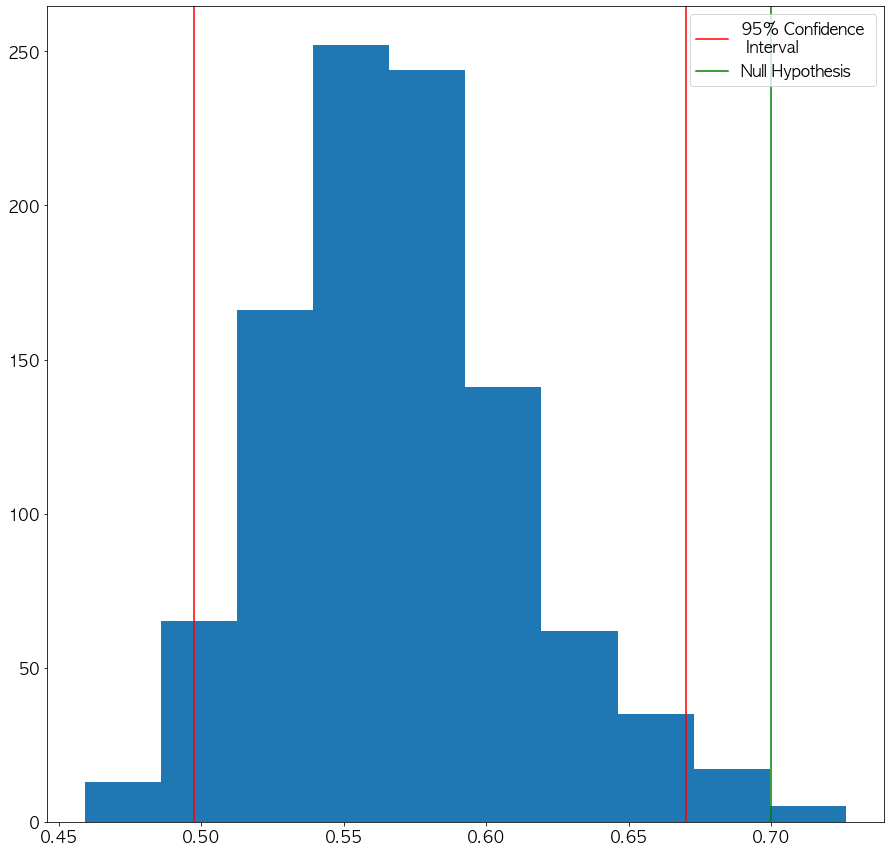

In [44]:
plt.hist(means)
low, upper = np.percentile(means, 2.5),np.percentile(means, 97.5) 
plt.axvline(x=low, color='r')
plt.axvline(x=upper, color='r', label='95% Confidence \n Interval')
plt.axvline(x=0.7, color='g', label = 'Null Hypothesis')
plt.legend()

---
# p-value 확인 (sports)
---
- P(0.9992)값이 0.05 보다 크므로 대립가설을 기각하고 귀무가설을 채택한다.
- 결론 귀무가설을 선택하고 sport 게임을 만들지 않는다. 

0.9992


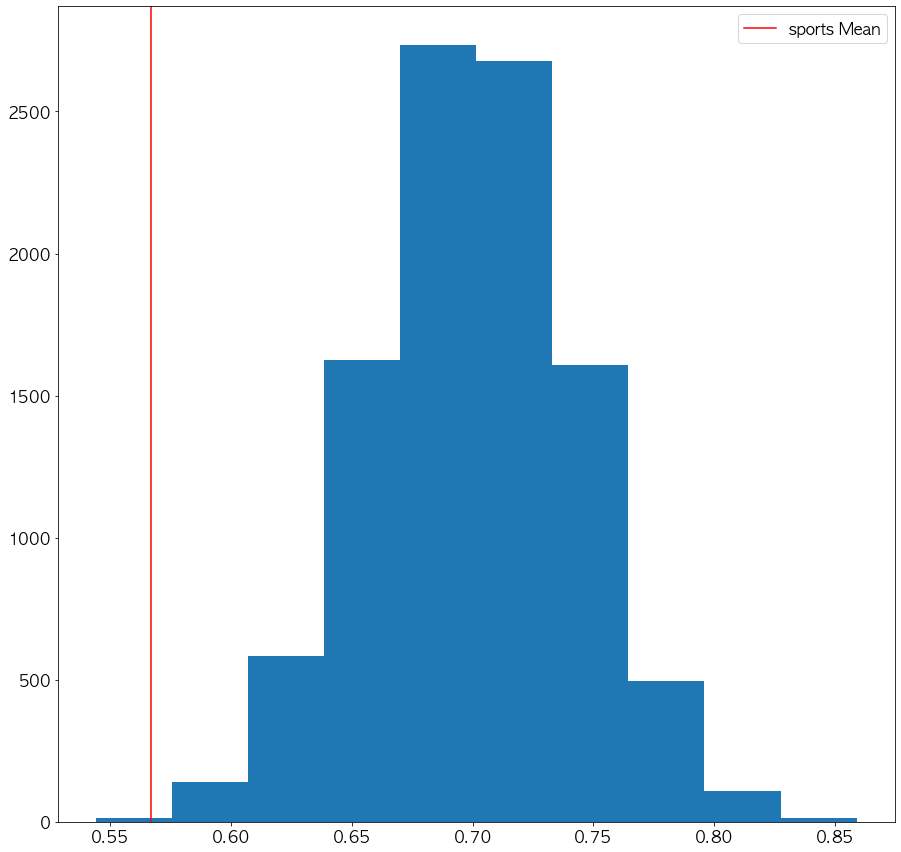

In [45]:
# 귀무가설이 .5m 이하일떄 
np.random.seed(10)
data_mean = copy_df[copy_df["Genre"] == "Sports"]["sum"].mean() # sport 전체 출고량 평균 
data_std = np.std(means)
hist_input = np.random.normal(0.7,data_std,10000) #귀무가설 분포 생성 
plt.hist(hist_input)
plt.axvline(data_mean, color='r', label='sports Mean')

print((hist_input > data_mean).mean()) # P(0.9992)값이 0.05 보다 크므로 대립가설을 기각한다. 
#결론 귀무가설을 선택하고 sport 게임을 만들지 않는다. 
plt.legend()

## 👉귀무가설 : platform 게임을 만들면 출고량은 0.7M이거나 이하일 것이다. 
## 👉대립가설 : platform 만들면 출고량 0.7M 이상일 것이다. 
### 신뢰구간으로 확인(Platform)
- 모수가 약(0.8~1.1) 포함될 확률이 95퍼센트이다. 
- 귀무가설 보다 크므로 귀무가설을 기각하고 대립가설 채택한다. 

In [46]:
means_platf = []
# len(copy_df[copy_df["Genre"] == "Platform"]) #844
for _ in range(1000):
    bootsample = copy_df[copy_df["Genre"] == "Platform"].sample(884,replace=True) 
    # 셈플갯수를 844로한것은 큰수의 법칙에 의해서 샘플이 커질수록 모수에 가까워진다. 
    means_platf.append(bootsample["sum"].mean())
    

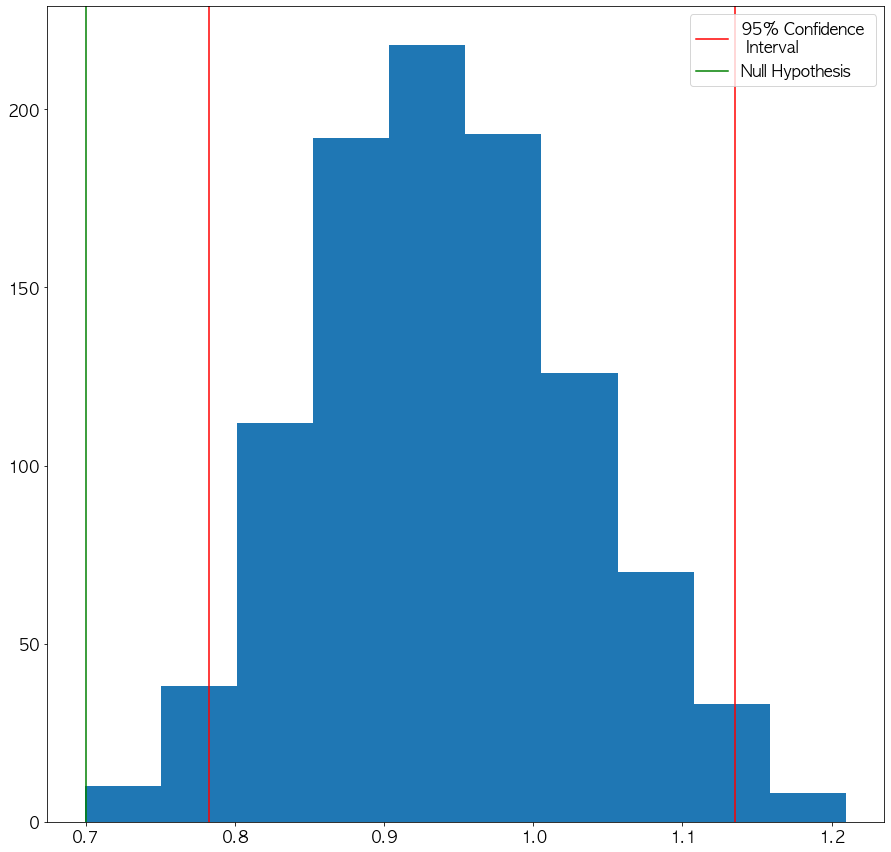

In [47]:
#신뢰구간   모집단 추정 분포가 귀무가설보다 높게 분포되어 있다. 귀무가설을 기각하고 대립가설을 채택 
plt.hist(means_platf)
low, upper = np.percentile(means_platf, 2.5),np.percentile(means_platf, 97.5) 
plt.axvline(x=low, color='r')
plt.axvline(x=upper, color='r', label='95% Confidence \n Interval')
plt.axvline(x=0.7, color='g', label = 'Null Hypothesis')
plt.legend()

In [48]:
copy_df[copy_df["Genre"] == "Platform"]["sum"].mean()

0.9391742081447951

---
# p-value 확인 (platform)
---
- P(0.0032)값이 0.05 보다 작으므로 대립가설을 채택하고 귀무가설을 기각한다.
- 결론 귀무가설을 기각하고 platform 게임을 만든다. 

0.0032


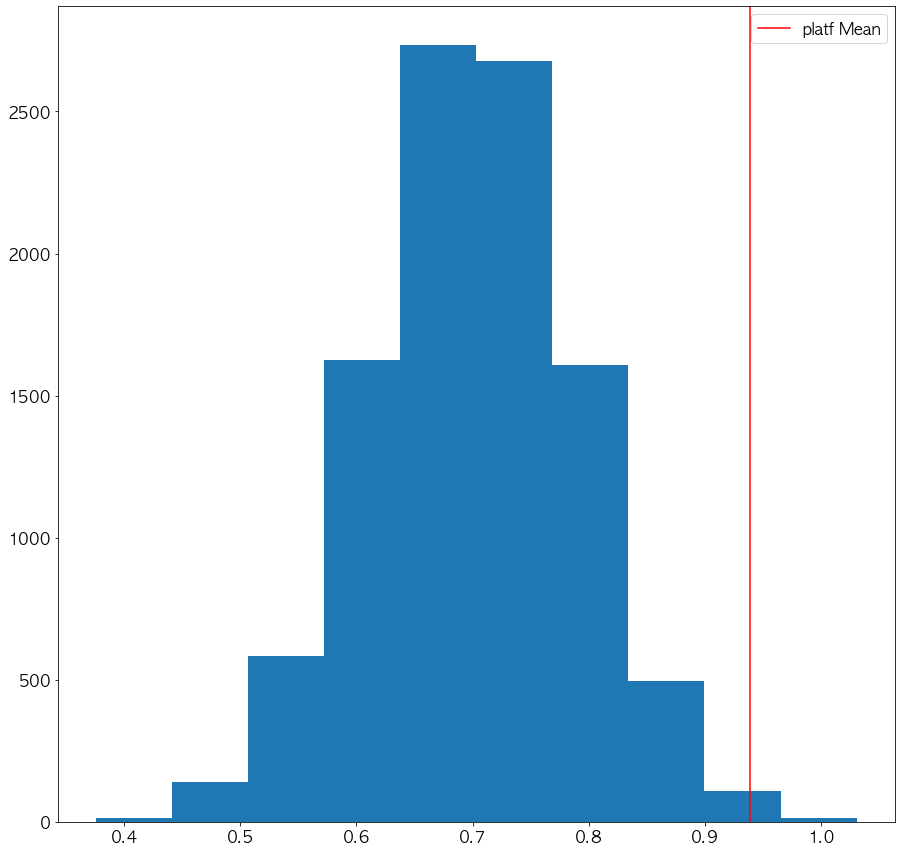

In [50]:
# 귀무가설이 .7m 이하일떄 
np.random.seed(10)
plat_data_mean = copy_df[copy_df["Genre"] == "Platform"]["sum"].mean() # plat 전체 출고량 평균 
plat_data_std = np.std(means_platf)
plat_hist_input = np.random.normal(0.7,plat_data_std,10000) #귀무가설 분포 생성 
plt.hist(plat_hist_input)
plt.axvline(plat_data_mean, color='r', label='platf Mean')

print((plat_hist_input > plat_data_mean).mean()) 

plt.legend()

# p값이 0 이므로 귀무가설을 기각하고 대립가설을 채택한다. (platform 게임을 만든다.)

In [51]:
from scipy import stats
sample = copy_df[copy_df["Genre"]=="Platform"]["sum"].sample(800,random_state = 123, replace = True)
result = stats.ttest_1samp(sample,plat_data_mean )   # ttest_1samp(첫번째 인자에 시리즈 형태로 넣으면 값이 Nan 생성,  arry 타입을 넣어야함 )
pv1 = result.pvalue
print(pv1)   # scipy를 사용한 1sample 테스트에서 p값이 0.05이상 나왔다 . 그러므로 모집단과 샘플사이에 차이가 없는것으로 보인다. 
# platform 평균적인 출고량이 대략 0.9로 나올텐데 잘만 만들면 이익실현(초기 예상 : 0.7) 확률이 높다 그러므로 platform게임을 만든다. 
# scipy 1sample test 는 원래 모집단 과 샘플 집단간의 차이가 있는지를 확인하는 함수이다.  이렇게 쓰는게 맞는지 모르겠네.. 
print(plat_data_mean)

0.2786191548028082
0.9391742081447951


In [52]:
p_i = copy_df[copy_df["Genre"]=="Platform"]["sum"]
s_i = copy_df[copy_df["Genre"]=="Sports"]["sum"]
pv2 = stats.ttest_ind(p_i ,s_i, alternative = "greater").pvalue #귀무 plat  =< sport (출고량) 대립 plat > sport 
pv2  # 매우 작은 값이 나왔다. 귀무가설을 기각하고 대립가설을 받아들인다. 

1.2979219234444935e-05

In [53]:

pv3 = stats.ttest_ind(s_i,p_i , alternative = "greater").pvalue #귀무 plat  >= sport (출고량) 대립 plat < sport 
pv3  # 매우 큰 값이 나왔다. 귀무가설을 기각 x 

0.9999870207807656

In [54]:
pv4 = stats.ttest_ind(s_i,p_i , alternative = "two-sided").pvalue
pv4    
# h0 : sport = plat 
# h1 : sport != plat 
# p값이 매우 작은값 이므로 h1 선택 

2.595843846888987e-05

In [55]:
copy_df[["Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2008,0.04,0.00,0.00,0.00
1,2009,0.17,0.00,0.00,0.01
2,2010,0.00,0.00,0.02,0.00
3,2010,0.04,0.00,0.00,0.00
4,2010,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,2006,0.15,0.04,0.00,0.01
16594,2005,0.01,0.00,0.00,0.00
16595,2015,0.44,0.19,0.03,0.13
16596,2013,0.05,0.05,0.25,0.03


In [56]:
df[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
pca_data = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pca_data)
scaler_df = scaler.transform(pca_data)
scaler_df

array([[50.48050838, 57.13692978, 11.93805759, 44.60608534],
       [35.28443669,  6.7941883 , 21.76729621,  3.82822442],
       [19.08427325, 25.19778483, 12.00272364, 17.29711476],
       ...,
       [-0.31184082, -0.29020692, -0.25149161, -0.25486439],
       [-0.31184082, -0.29020692, -0.25149161, -0.25486439],
       [-0.32408584, -0.29020692, -0.25149161, -0.25486439]])

In [57]:
from sklearn.decomposition import PCA

# 2차원으로 차원 축소, target 정보는 제외
pca = PCA(n_components = 2)
pca.fit(pca_data)
 
# pca transform 후 데이터프레임으로 자료형 변경
df_pca = pca.transform(pca_data)
df_pca = pd.DataFrame(df_pca, columns = ['component 0', 'component 1'])

pca.explained_variance_ratio_


array([0.83426141, 0.08326868])

In [58]:
import seaborn as sns 
df_pca["Genre"] = df["Genre"]
df_pca

,component 0,component 1,Genre
0,50.616568,-3.900532,Sports
1,27.498105,10.057528,Platform
2,20.388253,-3.604595,Racing
3,19.291098,-1.977437,Sports
4,15.352715,-4.360089,Role-Playing
...,...,...,...
16593,-0.306496,0.014917,Action
16594,-0.310365,0.001907,Puzzle
16595,-0.306496,0.014917,Adventure
16596,-0.306496,0.014917,Misc


### pca 진행시 인사이트 도출하지 못함. 

/Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


/Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


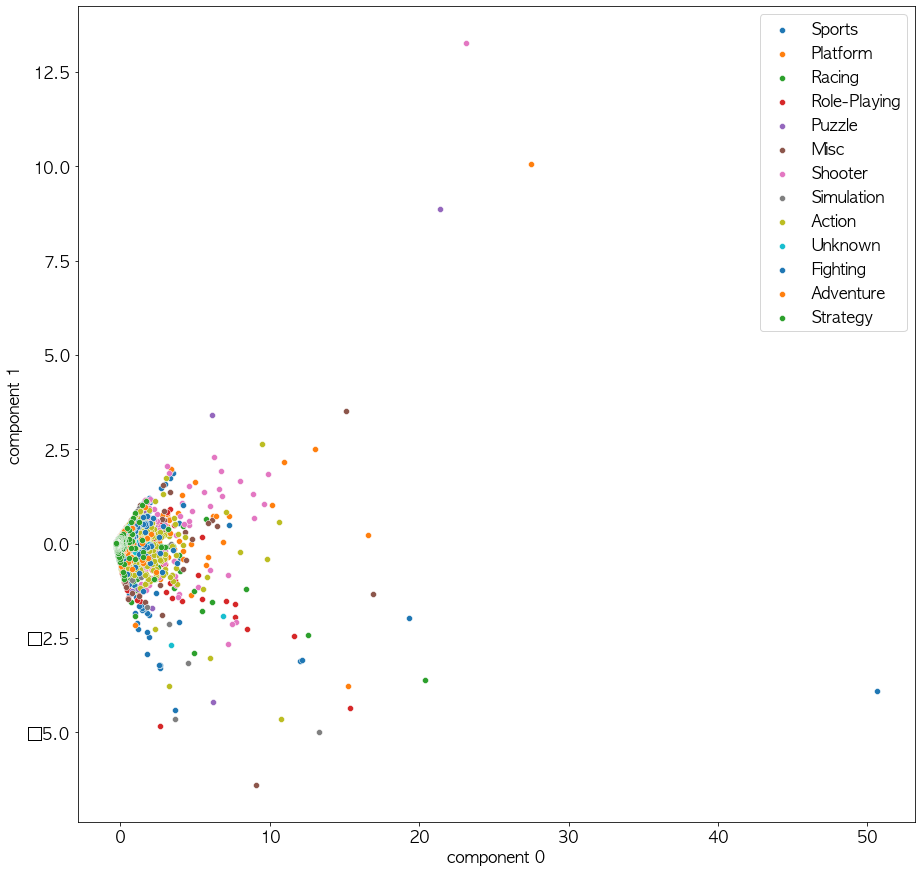

In [59]:
for i in df_pca["Genre"].unique(): 
    x = df_pca[df_pca["Genre"] == i]["component 0"]
    y = df_pca[df_pca["Genre"] == i]["component 1"]
    sns.scatterplot(x,y)
plt.legend(df_pca["Genre"].unique())

 # 뭐가 뭐진 구분이 안감....  
    